# Анализ данных по численным статитикам

In [14]:
import json
from tqdm.notebook import tqdm
from collections import Counter

##### Данные в формате LJSON

In [15]:
filename = "correct.txt"

### Статистика по авторам

In [16]:
all_authors = Counter()
id2name = {}

In [17]:
none_count = 0
with open(filename, "r") as fin:
    for line in tqdm(fin):
        obj = json.loads(line)
        
        if "authors" in obj and len(obj["authors"]) > 0:
            for author in obj["authors"]:
                if "_id" in author:
                    all_authors[author["_id"]] += 1
                    if "name" in author:
                        id2name[author["_id"]] = author["name"]
        else:
            none_count += 1

0it [00:00, ?it/s]

##### Топ-10 авторов по кол-ву публикаций

In [35]:
for ID, count in all_authors.most_common(10):
    name = id2name.get(ID)
    print(name, count)

HV Poor 1629
MS Alouini 1389
L Hanzo 1310
VCM Leung 1202
Wen Gao 1181
Philip S. Yu 1175
Hai Jin 1151
Z Han 1050
Chin-Chen Chang 1022
Leonard Barolli 1010


##### Кол-во статей без указанных авторов

In [33]:
none_count

33980

##### Какой процент публикаций принадлежит топ-1% авторам?

In [27]:
top1percent = int(0.01*len(all_authors))

In [28]:
top1authors = set()
for author, count in all_authors.most_common(top1percent):
    top1authors.add(author)

In [29]:
top1papers_count = 0
all_count = 0
with open(filename, "r") as fin:
    for line in tqdm(fin):
        obj = json.loads(line)
        
        if "authors" in obj and len(obj["authors"]) > 0:
            all_count += 1
            flag = False
            for author in obj["authors"]:
                if "_id" in author and author["_id"] in top1authors:
                    flag = True
                    
            if flag:
                top1papers_count += 1

0it [00:00, ?it/s]

##### ТОП-1% авторов встречаются почти в каждой второй статье

In [34]:
round(top1papers_count / all_count * 100, 1)

44.6

##### Сколько в среднем авторов у одной статьи?

In [47]:
authors_count = Counter()
with open(filename, "r") as fin:
    for line in tqdm(fin):
        obj = json.loads(line)
        
        if "authors" in obj and len(obj["authors"]) > 0:
            authors_count[len(obj["authors"])] += 1

0it [00:00, ?it/s]

In [71]:
for author_count, count in authors_count.most_common(10):
    print(f"{author_count} автор(а, ов) имеют {count} статей")

2 автор(а, ов) имеют 1409188 статей
3 автор(а, ов) имеют 1313595 статей
4 автор(а, ов) имеют 878286 статей
1 автор(а, ов) имеют 852257 статей
5 автор(а, ов) имеют 436331 статей
6 автор(а, ов) имеют 216698 статей
7 автор(а, ов) имеют 95811 статей
8 автор(а, ов) имеют 48503 статей
9 автор(а, ов) имеют 25333 статей
10 автор(а, ов) имеют 14967 статей


##### Максимальное количество авторов у одной статьи - 427

In [50]:
max(authors_count.keys())

427

## Статистика по годам

In [75]:
year_counter = Counter()
with open(filename, "r") as fin:
    for line in tqdm(fin):
        obj = json.loads(line)
        
        if "year" in obj:
            year_counter[obj["year"]] += 1

0it [00:00, ?it/s]

In [93]:
x = []
y = []
for year in sorted(year_counter.keys()):
    if year >= 1920 and year <= 2020:
        x.append(year)
        y.append(year_counter[year])

In [94]:
import matplotlib.pyplot as plt

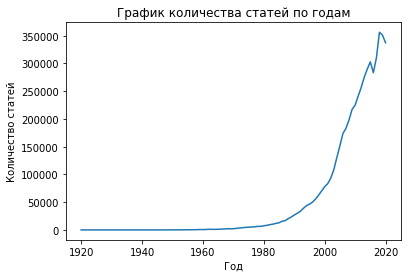

In [100]:
plt.plot(x, y)
plt.xlabel("Год")
plt.ylabel("Количество статей")
plt.title("График количества статей по годам")